# Keras ile MNIST Veri Seti Üzerinde Derin Öğrenme Uygulaması

In [22]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

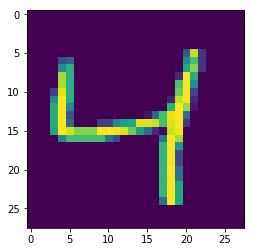

(60000, 28, 28)
(60000, 1, 28, 28)


In [11]:
np.random.seed(123)

(xt, yt), (xte, yte) = mnist.load_data()
plt.imshow(xt[2])
plt.show()

print(xt.shape)
xt = xt.reshape(xt.shape[0], 1, 28, 28)
xte = xte.reshape(xte.shape[0], 1, 28, 28)

print(xt.shape) #depth ekledik

In [12]:
xt = xt.astype('float32')
xte = xte.astype('float32')
xt /= 255
xte /= 255

In [13]:
print(yt.shape)
print(yt[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [15]:
y_t = np_utils.to_categorical(yt, 10)
y_te = np_utils.to_categorical(yte, 10)

print (y_t.shape)
print(y_t[:20])

(60000, 10)
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [85]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1, 28, 28), data_format='channels_first'))
print(model.output_shape)

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

print(model.output_shape)

(None, 32, 26, 26)
(None, 10)


In [86]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [90]:
model.fit(
    xt,
    y_t,
    batch_size=32,
    epochs=10,
    verbose=1
)

Epoch 1/10
 3328/60000 [>.............................] - ETA: 190s - loss: 0.0315 - acc: 0.9889

KeyboardInterrupt: 

In [96]:
score = model.evaluate(xte, y_te, verbose=1)

 9984/10000 [============================>.] - ETA: 0s

In [99]:
print(score)

[0.036071911439018778, 0.98829999999999996]
